***Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его.***

`SELECT
 model, count(FLIGHT_ID) as flights_amount
FROM
    flights 
    INNER JOIN aircrafts ON aircrafts.aircraft_code =flights.aircraft_code
Where 
DEPARTURE_TIME between '2018-09-01' and '2018-10-01'
GROUP BY
model`

***Посчитайте отправленные в сентябре рейсы самолётов следующих моделей:***
- Boeing,
- Airbus,
- другие (“other”).

`SELECT  
count(SUBQ.flight_id) as flights_amount ,
SUBQ.CASE
FROM(
    SELECT
    flight_id , CASE WHEN  MODEL LIKE 'Boeing%' THEN
        'Boeing'
    WHEN MODEL LIKE 'Airbus%' THEN
        'Airbus'
    ELSE 
 'other' 
    END 
FROM
    flights 
    INNER JOIN aircrafts ON aircrafts.aircraft_code =flights.aircraft_code
Where 
DEPARTURE_TIME between '2018-09-01' and '2018-10-01'
Group by
MODEL, flight_id) AS SUBQ
GROUP BY
SUBQ.CASE`

***Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city***

`SELECT 
 SUBQ.city,
 AVG(SUBQ.flight_count) AS average_flights
 
FROM(
    SELECT
 count(FLIGHT_ID) as flight_count,
 EXTRACT(day FROM CAST(flights.arrival_time AS date)) AS day_n,
 city
FROM
    flights 
    INNER JOIN airports ON airports.airport_code = flights.arrival_airport
Where 
CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'
GROUP BY
city, day_n) as SUBQ
GROUP BY
SUBQ.city`


***Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.***

`SELECT
festival_name,
 EXTRACT(week FROM CAST(FESTIVAL_DATE AS date)) AS festival_week
FROM
    festivals 
    INNER JOIN airports  ON airports.city = festivals.festival_city
Where
 FESTIVAL_DATE between '2018-07-23' and '2018-09-30'
 AND festival_city = 'Москва'
 GROUP BY
 FESTIVAL_NAME, FESTIVAL_DATE`
 
***Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount).***
*Получите таблицу:*
- с количеством купленных за неделю билетов;
- отметкой, проходил ли в эту неделю фестиваль;
- название фестиваля `festival_name`;
- номер недели `week_number`.

`SELECT
EXTRACT(week FROM CAST(departure_time  AS date)) AS week_number,
count(ticket_no) as ticket_amount,
finalTable.FESTIVAL_WEEK,
finalTable.FESTIVAL_NAME
FROM(
SELECT
*
FROM(
SELECT
festival_name,
 EXTRACT(week FROM CAST(FESTIVAL_DATE AS date)) AS festival_week,festival_city,
    AIRPORT_CODE
FROM
    festivals 
    INNER JOIN airports  ON airports.city = festivals.festival_city
Where
 FESTIVAL_DATE between '2018-07-23' and '2018-07-30'
 AND festival_city = 'Москва'
 GROUP BY
 FESTIVAL_NAME, FESTIVAL_DATE, festival_city, AIRPORT_CODE ) AS SUBQ
INNER JOIN flights  ON flights.arrival_airport = SUBQ.AIRPORT_CODE) as finalTable
INNER JOIN ticket_flights  ON ticket_flights.flight_id = finalTable.flight_id 
GROUP BY
departure_time,festival_week`

**Аналитика средствами Python**


**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [2]:
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [3]:
PlaneFly = pd.read_csv('/datasets/query_1.csv')
CityFly = pd.read_csv('/datasets/query_3.csv')
display(PlaneFly)
PlaneFly.info()
display(CityFly)
CityFly.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [4]:
print(PlaneFly.isna().sum())
print(CityFly.isna().sum())

model             0
flights_amount    0
dtype: int64
city               0
average_flights    0
dtype: int64


***Пропущенных значений нет. Так же все типы данных указаны корректно.***

In [5]:
TopCity = CityFly.sort_values(by=['average_flights'], ascending=False)
TopCity = TopCity.head(10).reset_index(drop=True)
display(TopCity)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


***Топ-10 городов по количеству рейсов***

Text(0.5, 1.0, 'топ-10 городов и среднее количество рейсов в эти города')

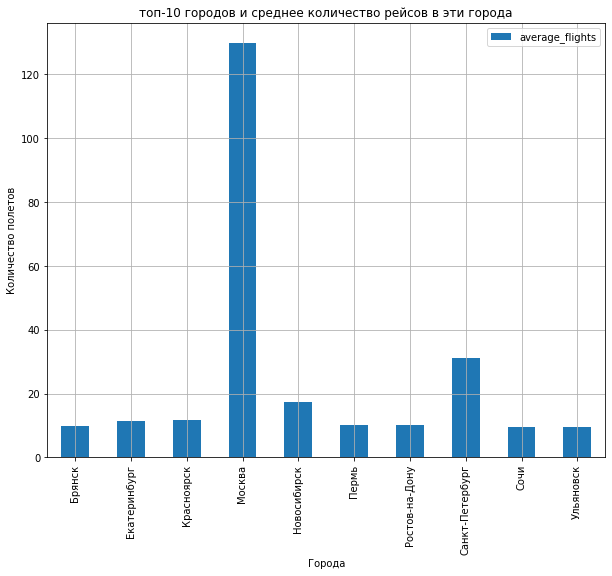

In [6]:
TopCity.pivot_table(index="city", values="average_flights").plot(kind="bar", grid=True, figsize=(10, 8)) # Количество проданных игр по годам
plt.xlabel('Города')
plt.ylabel('Количество полетов')
plt.title('топ-10 городов и среднее количество рейсов в эти города')

***Основное количество рейсов летит в Москву, но это не удивительно так как в этом гороже живет самое большое количество людей и это финансовый цетр. Питер второй по  велечине город за Москвой. Так-же остальные горда в этом списке миллионники поэтому и рейсов в них больше всех.***

Text(0.5, 1.0, 'Города и среднее количество рейсов в эти города')

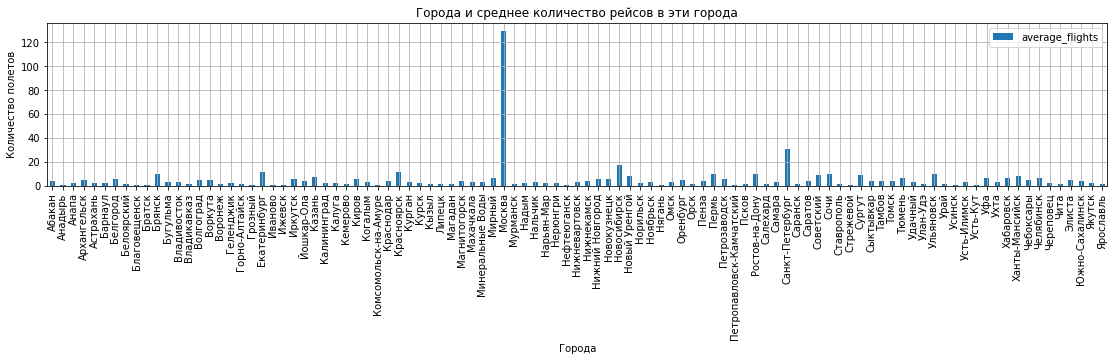

In [7]:
CityFly.pivot_table(index="city", values="average_flights").plot(kind="bar", grid=True, figsize=(19,3)) # Количество проданных игр по годам
plt.xlabel('Города')
plt.ylabel('Количество полетов')
plt.title('Города и среднее количество рейсов в эти города')

***Во всех остальных городах рейсов значительно меньше. Потому что причин леталь туда меньше и там нет больших аэропортов***

In [8]:
def alert_group_importance(row):
    city = row['city']
    fly = row['average_flights']
    
    if fly >= 20:
            return 'Очень большой город'
    elif 20 > fly >= 10:
            return 'Большой город'
    elif 10 > fly >= 5:
            return 'Средний город'
    return 'Маленький город'    
    
CityFly['City_all'] = CityFly.apply(alert_group_importance, axis=1)
print(CityFly['City_all'].value_counts())

Маленький город        71
Средний город          22
Большой город           6
Очень большой город     2
Name: City_all, dtype: int64


In [9]:
SityType = CityFly.groupby(by=["City_all"]).sum()
SityType

,average_flights
City_all,
Большой город,70.548387
Маленький город,172.945359
Очень большой город,160.935484
Средний город,150.483871


Text(0.5, 1.0, 'Города и среднее количество рейсов в эти города')

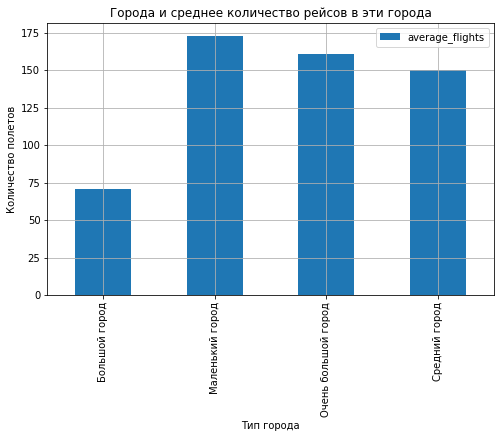

In [10]:
SityType.pivot_table(index="City_all", values="average_flights").plot(kind="bar", grid=True, figsize=(8,5)) # Количество проданных игр по годам
plt.xlabel('Тип города')
plt.ylabel('Количество полетов')
plt.title('Города и среднее количество рейсов в эти города')

***Но если посмотреть как отличаются среднее количество рейсов при деление городов на группы, то можно увидеть, что большая часть рейсов происходит между маленькими городам***

Text(0.5, 1.0, 'Модели самолётов и количество рейсов')

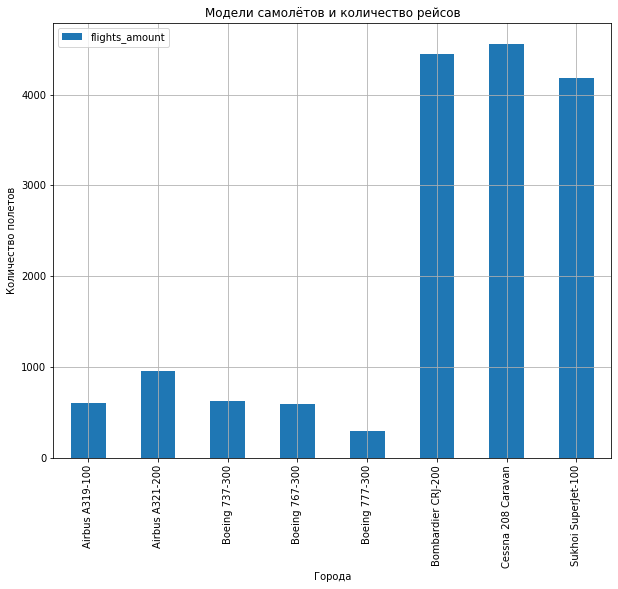

In [11]:
PlaneFly.pivot_table(index="model", values="flights_amount").plot(kind="bar", grid=True, figsize=(10, 8)) # Количество проданных игр по годам
plt.xlabel('Города')
plt.ylabel('Количество полетов')
plt.title('Модели самолётов и количество рейсов')

***
3 самых распостроннеых самолета это:
- Самолеты Cessna 208 Caravan в основном летают на очень маленькие дистанции. И в отдаленных местах где нет больших аэропортов. Поэтому их так много. 
- Sukhoi SuperJet-100 это Российский самолет, и он дешевле для наших авиаперевозчиков. Поэтому их очень много. 
- Так же еще есть Bombardier CRJ200 это очень маленький самолет для региональных перевозок.
***

# Вывод


***
- Можно сделать вывод что самым популярным городом для перелетов является Москва. Ждя этого есть множетсво причин. Такие как пересадки на международные рейсы, количество проживающих в этом городе людей, итд.
- Так же популярностью пльзуются и города миллионники в которых есть большие аэропорты такие как Новосибирск или Питер.
- Но если сгруппировать города, то получается перевозок между маленькими городами больше чем в Москве и Питере. 
- Самые популярные самолеты для региональных перевозок  Cessna 208 Caravan, связано это с тем что в большенстве мест нет больших аэропортов и живет не так много людей.

***